In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pdb
from tqdm.auto import tqdm
import multiprocessing as mp
from scipy.stats import norm as normal
import math

import matplotlib
import matplotlib.pyplot as plt

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '7'

from tqdm.auto import tqdm
import numpy as np

import torch
torch.manual_seed(123)

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import pdb

from torchvision.datasets import MNIST

import itertools
import copy

from scipy.ndimage import gaussian_filter
from scipy.ndimage.filters import convolve

import PIL
from PIL import Image

from scipy.interpolate import make_interp_spline, BSpline
from scipy.signal import savgol_filter

### Read and Generate CIFAR-10 Plots

In [4]:
plot_hist = np.load('TMLR_data/risk_numbeta_200_limit_20_smoothing_cifar_plot_hist.npy', allow_pickle=True).item()
plot_hist_new = {}
for (alpha, beta) in plot_hist:
    plot_hist_new[(round(alpha, 2), round(beta, 2))] = plot_hist[(alpha, beta)]
plot_hist = plot_hist_new

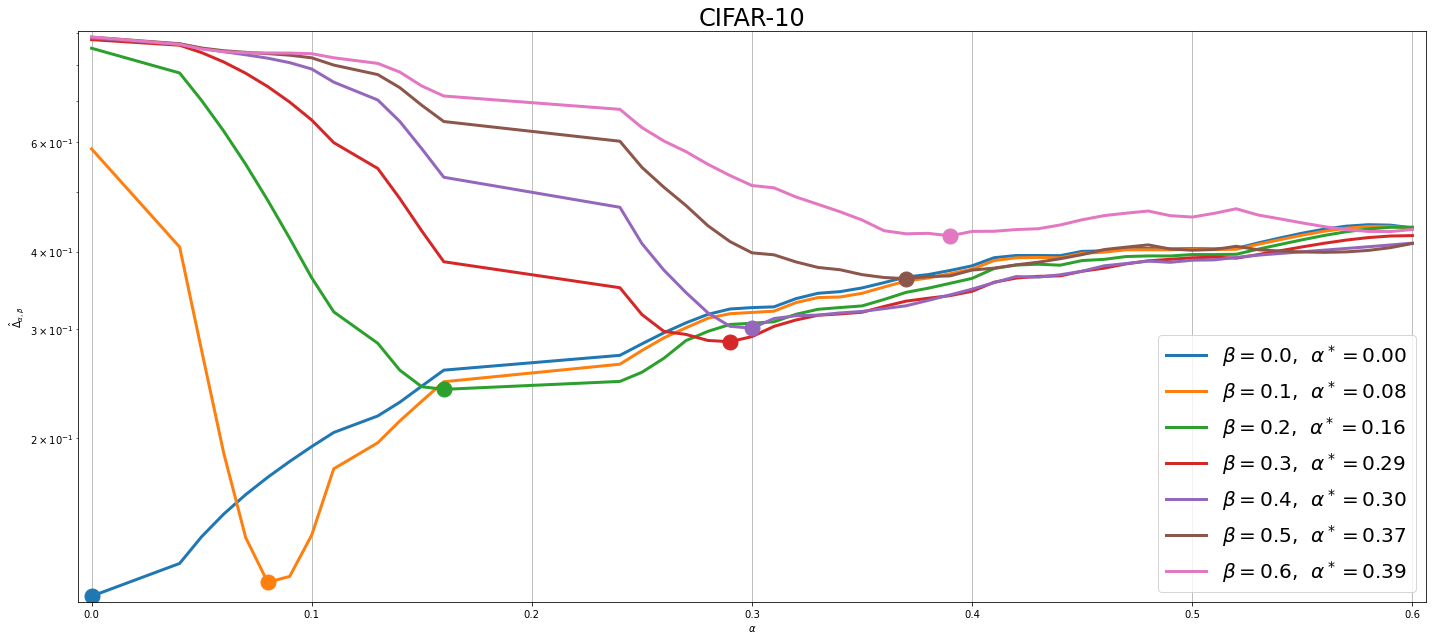

In [5]:
alpha_range_check = np.arange(0, 0.61, 0.01)
beta_range = np.arange(0, 0.61, 0.1)

plt.close('all')
plt.figure(figsize=(20, 9), tight_layout=True)
plt.autoscale(tight=True)
plt.margins(x=0.01, y=0.01)
plt.rc('axes', labelsize=24)
plt.rc('axes', titlesize=24)
plt.rc('legend', fontsize=20)
colormap = matplotlib.cm.get_cmap('tab20')

for beta in beta_range:
    alpha_range = []
    delta_alpha_beta0 = []
    for alpha in alpha_range_check:
        beta = round(beta, 2)
        alpha = round(alpha, 2)
        if (alpha, beta) in plot_hist:
            alpha_range.append(alpha)
            delta_alpha_beta0.append(plot_hist[(alpha, beta)][1])
    
    if len(delta_alpha_beta0) == 0:
        print (beta)
        continue
    
    ynew = savgol_filter(delta_alpha_beta0, 15, 3)
    istar = np.argmin(ynew)
    
    plot_color = colormap(beta)
    plt.plot(alpha_range[istar], ynew[istar],
             marker='o', markersize=15, markeredgecolor=plot_color, 
             markerfacecolor=plot_color, alpha=1)
    
    plt.plot(alpha_range, ynew, '-', c=plot_color, alpha=1, linewidth=3, 
            label=r'$\beta = %0.1f$,  $\alpha^*=%0.2f$' % (beta, alpha_range[istar]))

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\hat\Delta_{\alpha, \beta}$')
plt.grid('on')
plt.yscale('log')
plt.title(r'CIFAR-10')
plt.xticks(beta_range)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.show()

### Read and Generate MNIST Plots

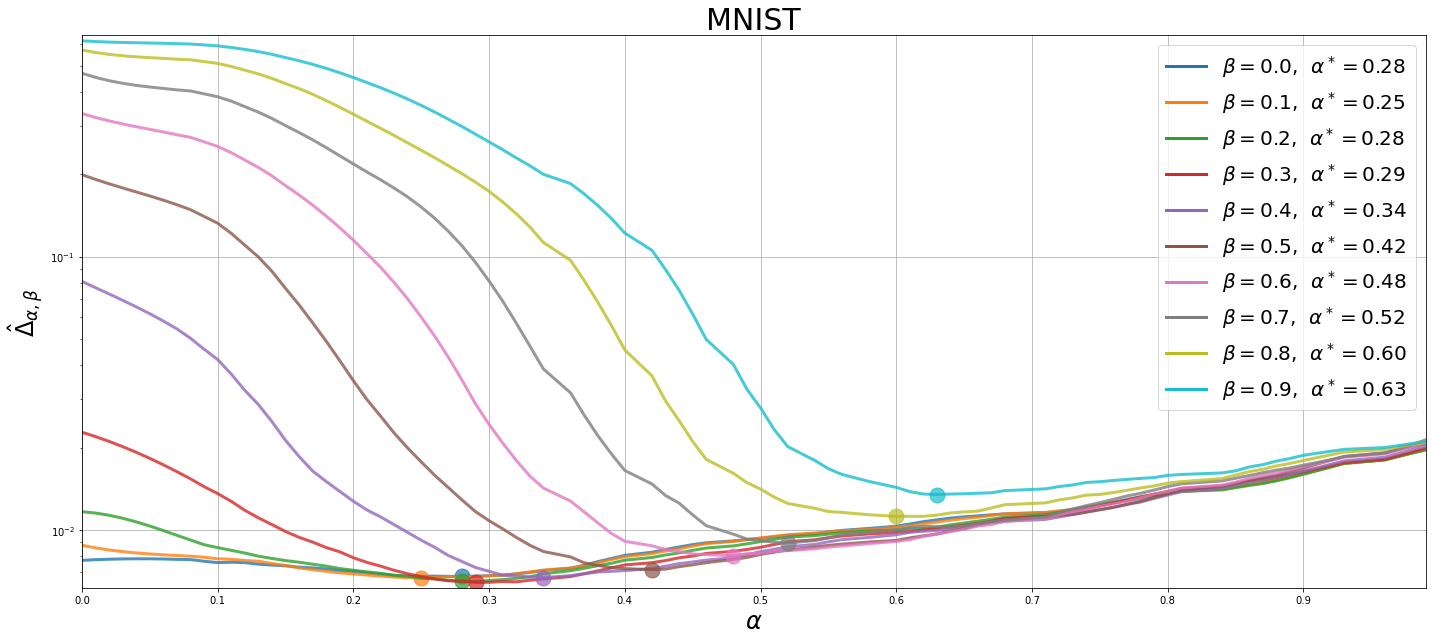

In [6]:
alpha_range_check = np.arange(0, 1, 0.01)
beta_range = np.arange(0, 1, 0.1)

plot_hist = np.load('TMLR_data/smoothing_mnist_plot_hist_risk.npy', allow_pickle=True).item()
plot_hist_new = {}
for (alpha, beta) in plot_hist:
    plot_hist_new[(round(alpha, 2), round(beta, 2))] = plot_hist[(alpha, beta)]
plot_hist = plot_hist_new

plt.close('all')
plt.figure(figsize=(20, 9), tight_layout=True)
plt.autoscale(tight=True)
plt.margins(x=0, y=0.01)
plt.rc('axes', labelsize=30)
plt.rc('axes', titlesize=30)
plt.rc('legend', fontsize=20)
colormap = matplotlib.cm.get_cmap('tab20')

for beta in beta_range:
    alpha_range = []
    delta_alpha_beta0 = []
    beta = round(beta, 2)
    for alpha in alpha_range_check:
        if (alpha, beta) in plot_hist:
            alpha_range.append(alpha)
            delta_alpha_beta0.append(plot_hist[(alpha, beta)][1])
    
    if len(delta_alpha_beta0) == 0:
        print (beta)
        continue
        
    ynew = savgol_filter(delta_alpha_beta0, 15, 3)
    istar = np.argmin(ynew)

    plot_color = colormap(beta)
    plt.plot(alpha_range[istar], ynew[istar],
             marker='o', markersize=15, markeredgecolor=plot_color, 
             markerfacecolor=plot_color, alpha=0.7)
    
    plt.plot(alpha_range, ynew, '-', c=plot_color, alpha=0.8, linewidth=3, 
            label=r'$\beta = %0.1f$,  $\alpha^*=%0.2f$' % (beta, alpha_range[istar]))

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\hat\Delta_{\alpha, \beta}$')
plt.grid('on')
plt.yscale('log')
plt.title(r'MNIST')
plt.xticks(beta_range)

leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.show()